In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model

In [2]:
gdp_data_url = 'https://raw.githubusercontent.com/ageron/data/main/lifesat/gdp_per_capita.csv'
oecd_data_url = 'https://raw.githubusercontent.com/ageron/data/main/lifesat/oecd_bli.csv'

In [3]:
gdp = pd.read_csv(gdp_data_url)
gdp = gdp.rename(columns={
    "Entity": "Country",
    "GDP per capita, PPP (constant 2017 international $)": "GDP per capita (USD)"
})
gdp.head()

,Country,Code,Year,GDP per capita (USD)
0,Afghanistan,AFG,2002,1189.784668
1,Afghanistan,AFG,2003,1235.810063
2,Afghanistan,AFG,2004,1200.278013
3,Afghanistan,AFG,2005,1286.793659
4,Afghanistan,AFG,2006,1315.789117


In [4]:
oecd = pd.read_csv(oecd_data_url, thousands=',')[['Country', 'Indicator', 'Measure', 'Inequality', 'Unit', 'PowerCode', 'Value']]
oecd.head()

,Country,Indicator,Measure,Inequality,Unit,PowerCode,Value
0,Australia,Labour market insecurity,Value,Total,Percentage,Units,5.4
1,Austria,Labour market insecurity,Value,Total,Percentage,Units,3.5
2,Belgium,Labour market insecurity,Value,Total,Percentage,Units,3.7
3,Canada,Labour market insecurity,Value,Total,Percentage,Units,6.0
4,Czech Republic,Labour market insecurity,Value,Total,Percentage,Units,3.1


In [5]:
gdp_2025 = gdp[(gdp["Year"] == 2015) & (gdp['GDP per capita (USD)'] <= 60000)][['Country', 'GDP per capita (USD)']]
gdp_2025.head()

,Country,GDP per capita (USD)
13,Afghanistan,2068.265904
44,Africa Eastern and Southern,3549.480563
75,Africa Western and Central,4202.057923
106,Albania,11878.488093
137,Algeria,11696.965229


In [18]:
life_satisfaction = oecd[(oecd["Indicator"] == "Life satisfaction") & (oecd["Inequality"] == "Total")][["Country", "Value"]]
life_satisfaction = life_satisfaction.rename(columns={"Value": "Life satisfaction"})

In [16]:
country_stats = pd.merge(gdp_2025, life_satisfaction, on='Country', how='inner')
country_stats.head()

,Country,GDP per capita (USD),Life satisfaction
0,Australia,47636.319642,7.3
1,Austria,52798.099461,7.1
2,Belgium,49455.441337,6.9
3,Brazil,15064.176069,6.4
4,Canada,47522.140667,7.4


In [8]:
# get GDP for the x-axis and Life Satisfaction for the y-axis
X = country_stats['GDP per capita (USD)'].values.reshape(-1, 1)
y = country_stats['Life satisfaction'].values.reshape(-1, 1)
X.shape, y.shape

((33, 1), (33, 1))

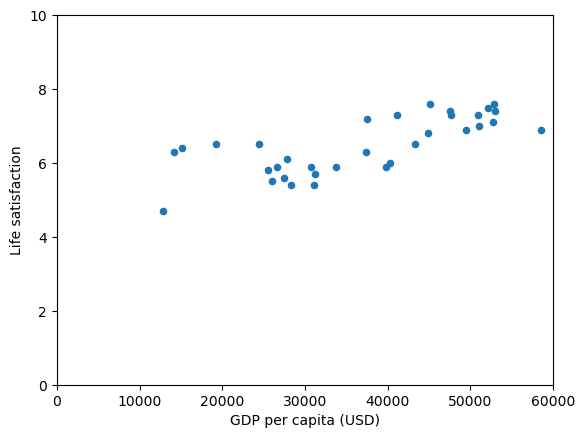

In [9]:
# Visualize Data
country_stats.plot(kind='scatter', x='GDP per capita (USD)', y='Life satisfaction', xlim=(0, 60000), ylim=(0,10))
plt.show()

In [10]:
# Select a Linear Model
model = sklearn.linear_model.LinearRegression()
# Train the Model
model.fit(X, y,)

LinearRegression()

In [12]:
gdp_value = gdp[gdp["Country"] == 'Cyprus']["GDP per capita (USD)"].values[0]
print(gdp_value)

25286.283375501


In [13]:
# Make a prediction for Cyprus
X_new = [[gdp_value]]  # Cyprus GDP per capita
print(model.predict(X_new))

[[5.95403958]]


In [14]:
# let's visualize our model, because it's a linear one, we can plot it using two points
X = [[10000], [50000]]
y_hat = model.predict(X)

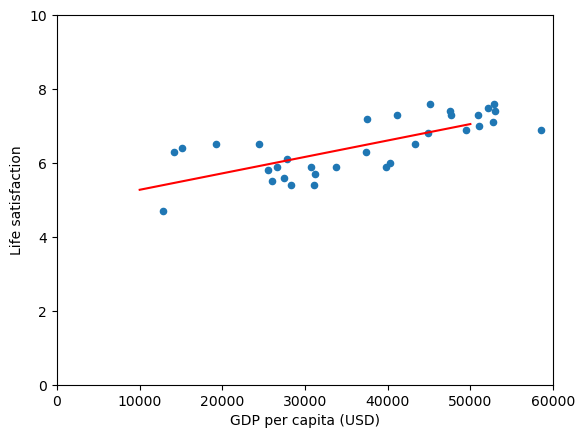

In [15]:
# Visualize Data
country_stats.plot(kind='scatter', x='GDP per capita (USD)', y='Life satisfaction', xlim=(0, 60000), ylim=(0,10))
plt.plot(X, y_hat, c='red')
plt.show()